# Nx versus T and OA

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv


In [3]:

import numpy as np



In [4]:
plot_path = Path('Plots')

In [5]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_{case}_{_x}_{_y}.png'
    return plot_path /f

In [6]:
plot_path.mkdir(exist_ok=True, parents=True)

# Load observational data: 

In [7]:
import pandas as pd

In [8]:
from bs_fdbck.constants import path_measurement_data

In [9]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )



In [10]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_Nx_daily_JA_median_df



#ds_ebas_Nx = get_ebas_dataset_with_Nx()

df_ebas_Nx, ds_ebas_Nx = get_ebas_dataset_Nx_daily_JA_median_df()#x_list = [90,100,110,120])

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


N50     1269.783175
N80      805.542366
N100     574.523542
N150     269.299283
N200     121.676226
N250      51.442931
N300      22.187408
JA         1.000000
dtype: float64


/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:265: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_JA.mean()
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:268: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_JA.median())


In [11]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)

df_hyy_1y.head()
df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
                            'T (degree C).1':'T (degree C)',
                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
                             'N100 (cm^-3).1':'N100 (cm^-3)'
                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1y

/tmp/ipykernel_100408/2004127510.py:3: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)


,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)
0,2012,14.819834,2.286611,485.015920
1,2013,16.061833,2.266324,458.851509
2,2014,18.469334,4.102861,706.239261
3,2015,14.949500,2.167607,499.026618
4,2016,13.959500,1.693031,418.417730
5,2017,13.619333,1.845648,409.297699
6,2018,17.848833,3.366803,770.183131


In [12]:
df_hyy_1y['year'] = df_hyy_1y['year'].apply(lambda x:f'{x:.0f}')

df_hyy_1y['date'] = df_hyy_1y['year']
df_hyy_1y = df_hyy_1y.set_index('date')

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )


df_hyy_1 = df_hyy_1.set_index('date')

In [13]:
df_hyy_1.index = df_hyy_1.index.rename('time')

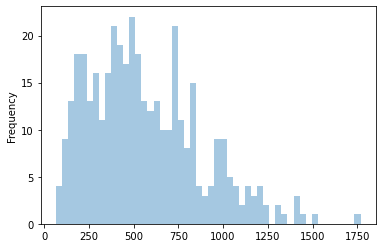

In [14]:
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 20% off their method? Is it integration?

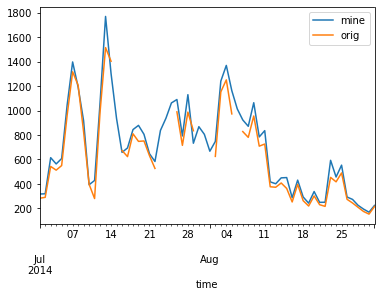

1.1045634776395359


In [15]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_1, left_index=True, right_index=True)
(df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()



print(df_joint_hyy['N100'][df_joint_hyy['N100 (cm^-3)'].notnull()].mean()/df_joint_hyy['N100 (cm^-3)'].mean())

# Read in model data:

## Settings:

In [16]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [17]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [18]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [19]:
cases_orig1 = ['OsloAero_intBVOC_f19_f19_mg17_full']
cases_orig2 = ['OsloAero_intBVOC_f19_f19_mg17_ssp245']

In [20]:
case_mod = 'OsloAero_intBVOC_f19_f19_mg17_fssp'

In [21]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2023-06-02 17:14:03,021 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


2023-06-02 17:14:03,021 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


## Variables

In [22]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
       'NCONC01','N50','N150','N200',
      'CLDFREE',
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [23]:
for case_name in cases_orig1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Ou

In [24]:
for case_name in cases_orig2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD500_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD440_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/ACTREL_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_s

In [25]:
dic_ds = dict()
for ca in cases_orig1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2023-06-02 17:14:04,456 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01

{'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01

In [26]:
#dic_ds = dict()
for ca in cases_orig2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2023-06-02 17:14:05,367 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD500_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD440_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/ACTREL_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/H2SO4_OsloAero_intBVOC_f19_f19

{'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD500_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD440_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/ACTREL_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/H2SO4_OsloAero_intBVOC_f19_f19

In [27]:
case1 = cases_orig1[0]
case2 = cases_orig2[0]

In [28]:
ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

In [29]:
from_t

'2012-01-01'

In [30]:
st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

In [31]:
print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [32]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

## SELECT STATION: 


In [33]:
ds_comb = ds_comb.sel(station='SMR')

In [34]:
dic_ds = dict()
dic_ds[case_mod] = ds_comb

In [35]:
ds_comb.load()

<xarray.Dataset>
Dimensions:   (time: 61345, lev: 32)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station   <U3 'SMR'
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Data variables: (12/35)
    ACTREL    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    BC_A      (time, lev) float32 3.611e-13 2.349e-13 ... 1.995e-11 2.124e-11
    BC_AC     (time, lev) float32 2.688e-17 1.224e-17 ... 7.686e-13 2.12e-12
    BC_AI     (time, lev) float32 1.362e-17 7.453e-18 ... 9.578e-13 1.665e-12
    BC_AX     (time, lev) float32 5.203e-14 3.366e-14 ... 3.534e-12 3.429e-12
    BC_N      (time, lev) float32 6.276e-14 3.982e-14 ... 1.845e-11 1.6e-11
    ...        ...
    SOA_LV    (time, lev) float32 1.125e-28 3.214e-28 ... 8.897e-14 1.184e-13
    SOA_NA    (time, lev) float32 1.169e-13 7.966e-14 ... 5.147e-13 6.991e-13
    SS_A1     (time, lev) float32 1.895e-24 3.756e-23 ... 1.337e-11 3.558e-11
    SS_A2     (time, lev) float32 4.764e-26 4.281e-25 ... 5.931e-11 1.57e-10
    SS_A3     (time, lev) float32 2.502e-29 1.686e-28 ... 1.476e-10 3.875e-10
    T         (time, lev) float32 213.2 208.2 193.4 186.4 ... 271.5 272.4 273.3

In [36]:
dic_ds[case_mod]

<xarray.Dataset>
Dimensions:   (time: 61345, lev: 32)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station   <U3 'SMR'
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Data variables: (12/35)
    ACTREL    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    BC_A      (time, lev) float32 3.611e-13 2.349e-13 ... 1.995e-11 2.124e-11
    BC_AC     (time, lev) float32 2.688e-17 1.224e-17 ... 7.686e-13 2.12e-12
    BC_AI     (time, lev) float32 1.362e-17 7.453e-18 ... 9.578e-13 1.665e-12
    BC_AX     (time, lev) float32 5.203e-14 3.366e-14 ... 3.534e-12 3.429e-12
    BC_N      (time, lev) float32 6.276e-14 3.982e-14 ... 1.845e-11 1.6e-11
    ...        ...
    SOA_LV    (time, lev) float32 1.125e-28 3.214e-28 ... 8.897e-14 1.184e-13
    SOA_NA    (time, lev) float32 1.169e-13 7.966e-14 ... 5.147e-13 6.991e-13
    SS_A1     (time, lev) float32 1.895e-24 3.756e-23 ... 1.337e-11 3.558e-11
    SS_A2     (time, lev) float32 4.764e-26 4.281e-25 ... 5.931e-11 1.57e-10
    SS_A3     (time, lev) float32 2.502e-29 1.686e-28 ... 1.476e-10 3.875e-10
    T         (time, lev) float32 213.2 208.2 193.4 186.4 ... 271.5 272.4 273.3

# Functions:

In [37]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [38]:
case_mod

'OsloAero_intBVOC_f19_f19_mg17_fssp'

hey
-1
SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR
cloud_avg median
station


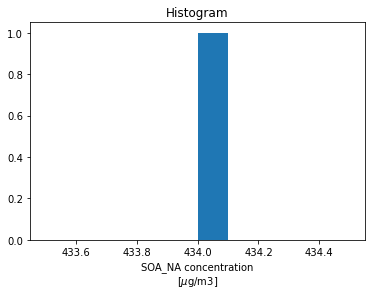

merge
df1


In [39]:


dic_df_sm, dic_df = ds2df_inc_preprocessing(dic_ds, model_lev_i=-1, return_summer_median=True)

## Merge with observations: 

In [40]:
dic_df_pre = dic_df.copy()

In [41]:
for ca in dic_df.keys():
    dic_df[ca] = pd.merge(dic_df_pre[ca], df_hyy_1, right_on='time', left_on='time')
    dic_df[ca]['year'] = dic_df[ca].index.year

In [42]:
dic_df[case_mod]['N50']

time
2012-07-01    1986.001366
2012-07-02    1363.104724
2012-07-03    1516.824991
2012-07-04    2155.595109
2012-07-05    2786.008623
                 ...     
2018-08-27     908.116881
2018-08-28    1389.253115
2018-08-29    1755.988330
2018-08-30    2491.628215
2018-08-31    2481.825634
Name: N50, Length: 434, dtype: float64

In [43]:
df_hyy_1

,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3)
time,,,,,,
2012-07-01,2012,7,1,17.308417,3.014541,781.245471
2012-07-02,2012,7,2,16.753084,1.697459,635.103339
2012-07-03,2012,7,3,17.366917,2.350536,745.212064
2012-07-04,2012,7,4,18.099667,2.118566,734.009356
2012-07-05,2012,7,5,19.267666,3.413631,1019.238450
...,...,...,...,...,...,...
2018-08-27,2018,8,27,12.378417,1.065071,423.684130
2018-08-28,2018,8,28,13.056500,1.517197,513.888488
2018-08-29,2018,8,29,15.028000,2.148551,720.768715


In [44]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'OA (microgram m^-3)','N100 (cm^-3)','N50','N150','N200']
    var_exist = df.columns
    
    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for c in dic_df.keys():
    
    dic_df[c] = add_log(dic_df[c])
    dic_df_sm[c] = add_log(dic_df_sm[c])
        
df_joint_hyy = add_log(df_joint_hyy)
#df_joint_hyy = add_log(df_joint_hyy)
df_joint_hyy = add_log(df_joint_hyy)
df_hyy_1y = add_log(df_hyy_1y)

{'N150', 'N100', 'N50', 'N100 (cm^-3)', 'N200', 'OA (microgram m^-3)', 'OA'}
{'N150', 'N100', 'N50', 'N200', 'OA'}
{'N100', 'N150', 'N50', 'N100 (cm^-3)', 'N200', 'OA (microgram m^-3)'}
{'N100', 'N150', 'N50', 'N100 (cm^-3)', 'N200', 'OA (microgram m^-3)'}
{'N100 (cm^-3)', 'OA (microgram m^-3)'}


In [45]:
df_joint_hyy

,N50,N80,N100,N150,N200,N250,N300,JA,season,year,...,day,T (degree C),OA (microgram m^-3),N100 (cm^-3),log10(N100),log10(N150),log10(N50),log10(N100 (cm^-3)),log10(N200),log10(OA (microgram m^-3))
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01,1485.210612,1114.389039,861.503945,446.026654,188.380724,74.432850,31.942975,True,JJA,2012,...,1,17.308417,3.014541,781.245471,2.935257,2.649361,3.171788,2.892788,2.275036,0.479221
2012-07-02,1674.994035,1012.536901,682.259123,286.585446,111.231401,38.113671,13.678852,True,JJA,2012,...,2,16.753084,1.697459,635.103339,2.833949,2.457254,3.224013,2.802844,2.046227,0.229799
2012-07-03,1802.136980,1196.939662,802.811492,274.242425,128.902490,55.303240,22.585224,True,JJA,2012,...,3,17.366917,2.350536,745.212064,2.904614,2.438135,3.255788,2.872280,2.110261,0.371167
2012-07-04,1752.092185,1130.830277,814.987338,286.979969,98.877135,33.037368,12.966394,True,JJA,2012,...,4,18.099667,2.118566,734.009356,2.911151,2.457852,3.243557,2.865702,1.995096,0.326042
2012-07-05,1872.077225,1378.420308,1143.708205,478.955912,148.658854,45.144714,16.757472,True,JJA,2012,...,5,19.267666,3.413631,1019.238450,3.058315,2.680296,3.272324,3.008276,2.172191,0.533217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-27,1263.658424,693.808317,439.094326,133.679227,44.368642,16.590083,7.655230,True,JJA,2018,...,27,12.378417,1.065071,423.684130,2.642558,2.126064,3.101630,2.627042,1.647076,0.027378
2018-08-28,2012.830147,1199.564603,782.377331,273.314246,93.388464,32.091066,13.632253,True,JJA,2018,...,28,13.056500,1.517197,513.888488,2.893416,2.436662,3.303807,2.710869,1.970293,0.181042
2018-08-29,1668.422340,1149.339129,785.372117,290.725508,91.508597,29.149057,11.873071,True,JJA,2018,...,29,15.028000,2.148551,720.768715,2.895075,2.463483,3.222306,2.857796,1.961462,0.332146


In [46]:
ca = case_mod

In [47]:
mask_obs_N = dic_df[ca]['N100 (cm^-3)'].notnull()
mask_obs_OA = dic_df[ca]['OA (microgram m^-3)'].notnull()

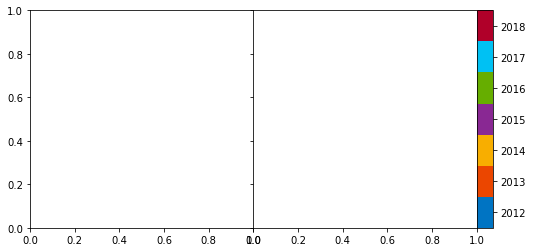

In [48]:
fig, axs, cax = make_cool_grid()

# Plots

In [49]:
df_s['log10(OA (microgram m^-3))']

NameError: name 'df_s' is not defined

In [ ]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid()

v_x = 'T_C'
v_y = 'OA'
ca = case_mod
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
ylims = [0,12]

xlims = [5,30]
ylab = 'OA  $\mu m^{-3}$)'

xlab = r'N$_{50}$ [cm$^{-3}$]'
xlab = r'T [$^\circ$C]'

fig, ax = plot_scatter(v_x, v_y, df_s, df_sy, ca, xlims=xlims,
                       figsize=[6,7], ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')


v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2019']

df_sy = df_hyy_1y#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x, v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)

plt.show()

## Log scale

In [ ]:
fig, axs, cax = make_cool_grid()

v_y = 'log10(OA)'

v_x = 'T_C'
ca = case_mod
df_s = df_joint_hyy[mask_obs_N].loc['2012':]
df_s = dic_df[ca][mask_obs_N].loc['2012':]


df_sy = dic_df_sm[ca].loc['2012':]
ylims = [-.75,1.25]
ylims =[-1,1.1]# [0,5000]


xlims = [5,30]
ylab = 'log(OA  $\mu m^{-3}$)'

xlab = r'T [$^\circ$C]'

fig, ax = plot_scatter(v_x, v_y, df_s, df_sy, ca, xlims=xlims,
                       figsize=[6,7], ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                       legend_loc='lower right')
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')


v_y = 'log10(OA (microgram m^-3))'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2019']

df_sy = df_hyy_1y#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x, v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab,
                       legend_loc='lower right')
ax.set_title('Observations')
fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)

plt.show()